<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/05_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ricos pelo Acaso

Link para o vídeo: https://youtu.be/d2qrsCfXung

# 1. Importando bibliotecas

In [0]:
# O Pyfolio está apresentado erro com a versão 1.0 do Pandas por isso acrescentei esse código para que o Google Colab use a versão anterior. Será necessário o restart da Runtime.
!pip install pandas==0.25.3

In [1]:
# Conferindo a versão do Pandas que está sendo usada
import pandas as pd
pd.__version__

'0.25.3'

In [0]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [5]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [6]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-04-30,16.423456,5.743111,5.824075,19.788538,11.095176,56229.0
2015-05-04,16.761456,5.797244,6.243565,21.649445,11.482473,57354.0
2015-05-05,16.960794,5.727955,6.487454,23.641405,11.627790,58052.0
2015-05-06,17.194796,5.668414,6.799632,21.780497,11.503244,57103.0
2015-05-07,16.908794,5.704138,6.116742,20.863142,11.524017,56921.0
...,...,...,...,...,...,...
2020-04-24,11.110000,8.400000,4.324811,43.759998,38.709999,75331.0
2020-04-27,11.610000,8.670000,4.324811,44.549999,40.599998,78239.0
2020-04-28,11.700000,9.280000,4.693516,44.610001,41.580002,81312.0


In [7]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-04,0.020580,0.009426,0.072027,0.094040,0.034907,0.020007
2015-05-05,0.011893,-0.011952,0.039062,0.092010,0.012656,0.012170
2015-05-06,0.013797,-0.010395,0.048120,-0.078714,-0.010711,-0.016347
2015-05-07,-0.016633,0.006302,-0.100430,-0.042118,0.001806,-0.003187
...,...,...,...,...,...,...
2020-04-24,-0.038095,-0.049774,-0.088235,0.005746,-0.022228,-0.054498
2020-04-27,0.045005,0.032143,0.000000,0.018053,0.048825,0.038603
2020-04-28,0.007752,0.070358,0.085253,0.001347,0.024138,0.039277


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-04-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-04,1.020580,1.009426,1.072027,1.094040,1.034907,1.020007
2015-05-05,1.032718,0.997361,1.113903,1.194702,1.048004,1.032421
2015-05-06,1.046966,0.986994,1.167504,1.100662,1.036779,1.015544
2015-05-07,1.029552,0.993214,1.050251,1.054304,1.038651,1.012307
...,...,...,...,...,...,...
2020-04-24,0.676471,1.462622,0.742575,2.211381,3.488904,1.339718
2020-04-27,0.706916,1.509635,0.742575,2.251303,3.659248,1.391435
2020-04-28,0.712396,1.615849,0.805882,2.254335,3.747575,1.446087


In [9]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-04-30,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-05-04,10205.802810,10094.256336,10720.269495,10940.396205,10349.068495,52309.793341,0.046196
2015-05-05,10327.177331,9973.610484,11139.029325,11947.019598,10480.041705,53866.878443,0.029767
2015-05-06,10469.657183,9869.935488,11675.042595,11006.622430,10367.789268,53389.046964,-0.008871
2015-05-07,10295.515271,9932.138991,10502.513106,10543.043673,10386.511760,51659.722802,-0.032391
...,...,...,...,...,...,...,...
2020-04-24,6764.714763,14626.218130,7425.747730,22113.810716,34889.036443,85819.527782,-0.027420
2020-04-27,7069.157381,15096.347388,7425.747730,22513.032183,36592.478942,88696.763625,0.033527
2020-04-28,7123.957145,16158.488870,8058.817895,22543.353459,37475.748734,91360.366103,0.030030


# 3. Resultados

Start date,2015-04-30
End date,2020-04-30
Total months,59
,Backtest
Annual return,12.5%
Cumulative returns,79.0%
Annual volatility,29.0%
Sharpe ratio,0.55
Calmar ratio,0.29
Stability,0.86
Max drawdown,-43.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.82,2015-05-05,2016-01-18,2017-01-20,449
1,38.33,2020-02-19,2020-03-18,NaT,NaN
2,20.96,2018-02-26,2018-06-21,2019-01-21,236
3,13.86,2017-02-21,2017-04-13,2017-08-02,117
4,13.56,2019-07-10,2019-08-26,2019-11-07,87


Stress Events,mean,min,max
Fall2015,-0.13%,-3.98%,4.30%
New Normal,0.06%,-14.05%,11.29%


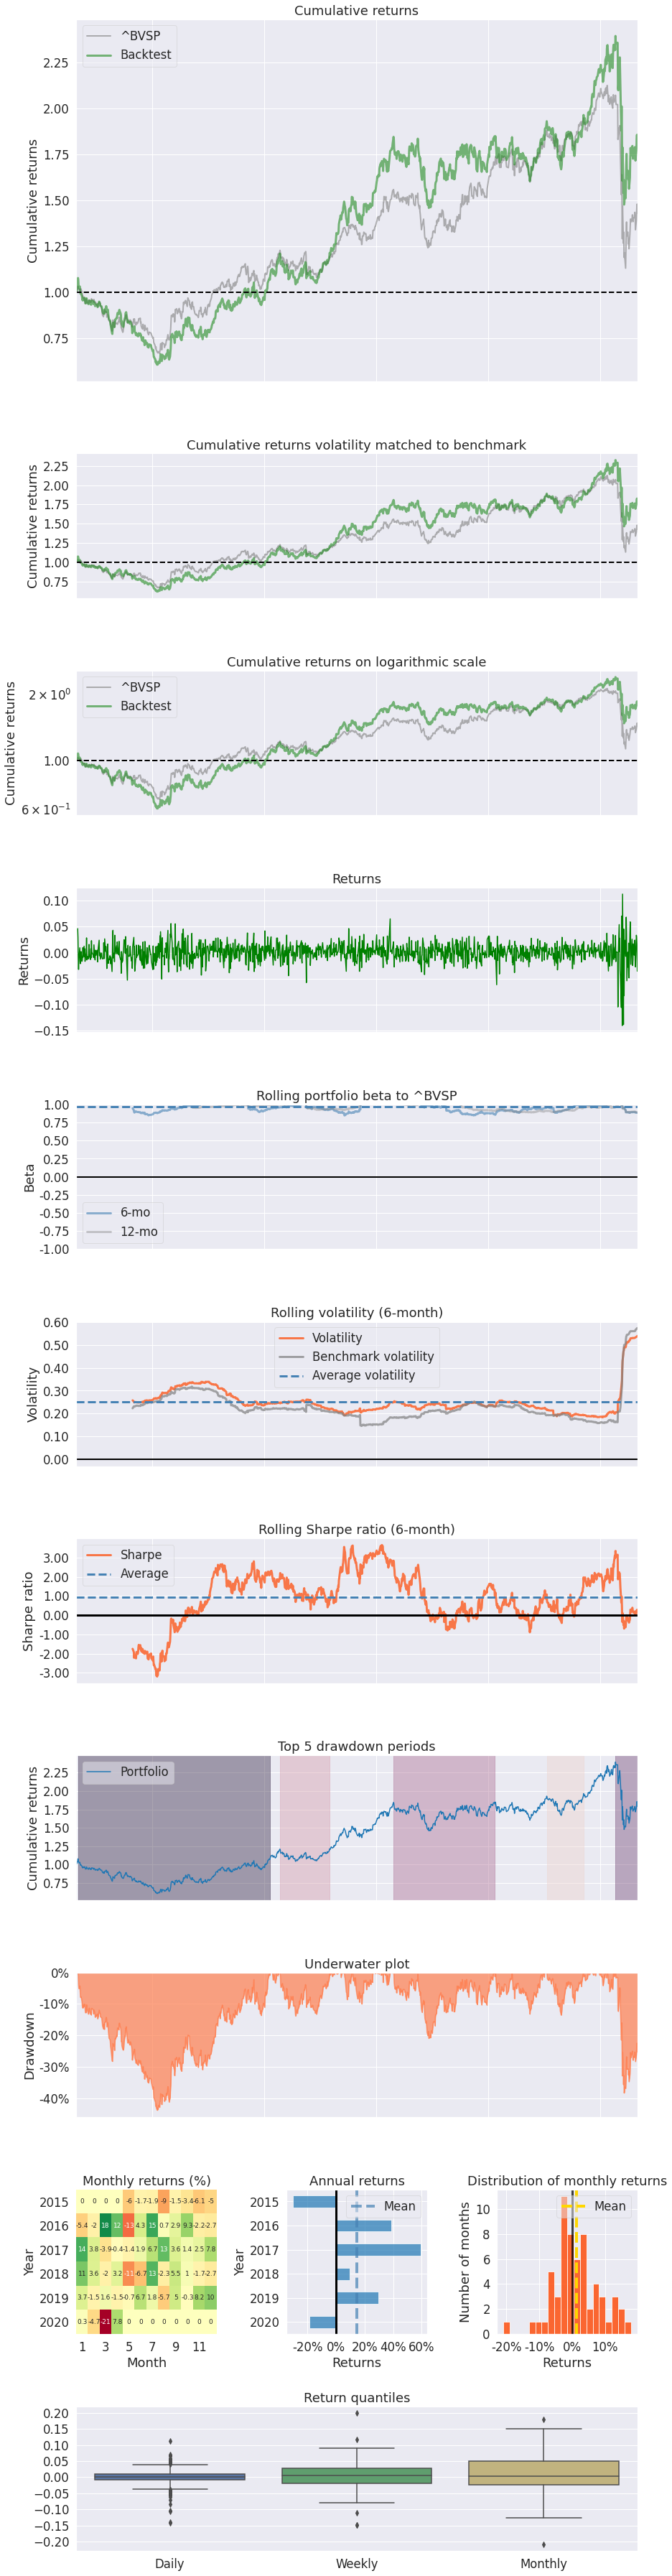

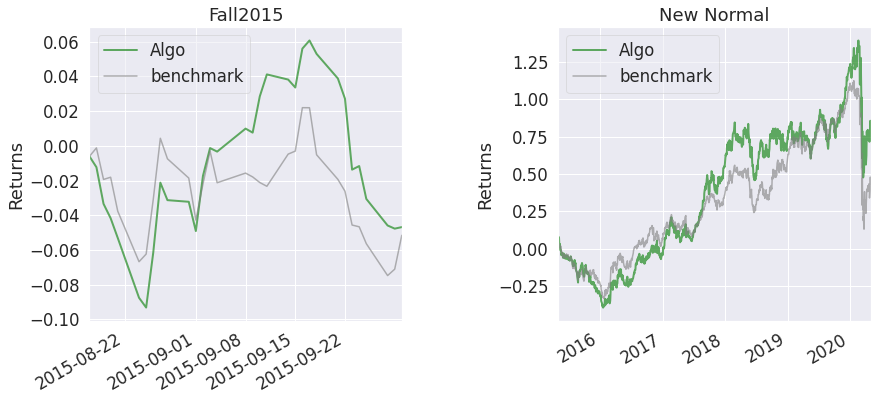

In [10]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


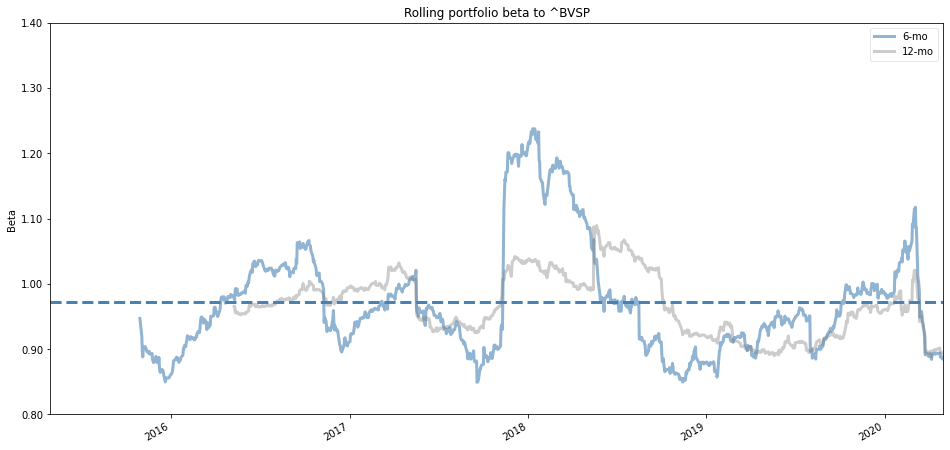

In [12]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));